## Connected-component Labeling Quiz

In [1]:
import cv2 as cv
import numpy as np
import mods.kYaDemo as kdm
from matplotlib import pyplot as plt
import imutils

1. **Use advanced contour properties to answer “What is the aspect ratio of the circle?” (more_shapes_example.png)**
- *Answer:  1*  
2. **What is the aspect ratio of the orange rectangle? (more_shapes_example.png)**
- *Answer:  3.3* 

Arrow result 2.736111111111111
Extent of the purple arrow:  0.4924562887760857
Circle result 1.0
Rectangle result 3.326923076923077


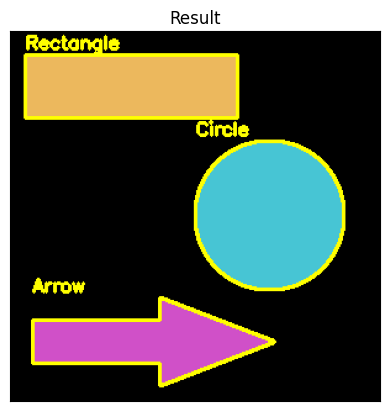

In [2]:
# Load the image and convert it to grayscale
img = cv.imread("./src/more_shapes_example.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Find the contours in the image
cnts = cv.findContours(gray.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv.arcLength(c, True)
	approx = cv.approxPolyDP(c, 0.01 * peri, True)

    # draw the outline of the contour and draw the text on the img
	cv.drawContours(img, [c], -1, (0, 255, 255), 2)
	(x, y, w, h) = cv.boundingRect(approx)
	res = aspect_ratio = float(w) / h

	# if the approximated contour has 4 vertices, then we are examining
	# a circle
	if len(approx) > 10:
		cv.putText(img, "Circle", (x, y - 5), cv.FONT_HERSHEY_SIMPLEX,
			0.5, (0, 255, 255), 2)
		print(f"Circle result {res}")
	elif len(approx) < 8 and len(approx) > 4:
		cv.putText(img, "Arrow", (x, y - 5), cv.FONT_HERSHEY_SIMPLEX,
			0.5, (0, 255, 255), 2)
		print(f"Arrow result {res}")

		# Calculate the area of the purple arrow contour
		arrow_area = cv.contourArea(c)
		# Calculate the area of the bounding rectangle
		rect_area = w * h
		# Calculate the extent
		extent = float(arrow_area) / rect_area
		print("Extent of the purple arrow: ", extent)
	else:
		cv.putText(img, "Rectangle", (x, y - 5), cv.FONT_HERSHEY_SIMPLEX,
			0.5, (0, 255, 255), 2)
		print(f"Rectangle result {res}")

# show the output img
kdm.show_rgb_image(img, "Result")

3. **What is the solidity of the arrow? (more_shapes_example.png)**
- *Answer:  1*  

_Note_: In computer vision, solidity is a measure of the compactness of an object. It is defined as the ratio of the area of the object to the area of its convex hull. The convex hull of an object is the smallest convex polygon that completely encloses the object. The solidity of an object ranges from 0 to 1, with 1 indicating a completely solid object with no holes or concavities, and values closer to 0 indicating more irregular or porous shapes. Solidity is often used as a feature in object recognition and classification algorithms.

In [3]:
# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Threshold the image
_, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)

# Find the contours
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Calculate the solidity of the largest contour
largest_contour = max(contours, key=cv.contourArea)
area = cv.contourArea(largest_contour)
convex_hull = cv.convexHull(largest_contour)
convex_hull_area = cv.contourArea(convex_hull)
solidity = float(area) / convex_hull_area

# Print the solidity
print("Solidity:", solidity)

Solidity: 0.9940495867768595


4. **What about the extent of the purple arrow? (more_shapes_example.png)**
- *Answer:  0.48*

In [4]:
# Load the image
img = cv.imread('./src/more_shapes_example.png')

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Threshold the image
ret, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)

# Find the contours
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Get the contour of the purple arrow
arrow_contour = contours[0]

# Calculate the area of the purple arrow contour
arrow_area = cv.contourArea(arrow_contour)

# Calculate the bounding rectangle of the purple arrow contour
x, y, w, h = cv.boundingRect(arrow_contour)

# Calculate the area of the bounding rectangle
rect_area = w * h

# Calculate the extent
extent = float(arrow_area) / rect_area

# Print the extent of the purple arrow
print("Extent of the purple arrow: ", extent)

Extent of the purple arrow:  0.48070692194403536


4. **The convex hull of a shape is:**
- *Answer:  The smallest possible convex set of points that fully contains a given shape.*